In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import linregress
from utils import plots, plots_survival
%matplotlib inline

Load merged datasheet (Vasari, Midline Shift Quantifications, Imaging Features, Clinical Data)

In [2]:
merged_data = pd.read_csv("datasheets/cleaned_merged.csv")

merged_data.head()

# vasari_list = [key for key in merged_data.keys() if "vasari" in key.lower() and any(['text_report', 'region_proportions'])]
vasari_list = [k for k in merged_data if "vasari" in k.lower() and not any(s in k.lower() for s in ["text_report", "region_proportions"])]
midline_shift = ['brats23_metadata_flattened__global__max_midline_shift_mm']
mutation_status = [key for key in merged_data.keys() if any(s in key.lower() for s in ["mgmt_status", "idh_status"])]
brats_masks = ["GBM_Subjects_Spreadsheet__nr_volume", "GBM_Subjects_Spreadsheet__er_volume" , "GBM_Subjects_Spreadsheet__et_volume" , "GBM_Subjects_Spreadsheet__tumor_volume" , "GBM_Subjects_Spreadsheet__tumor_burden" , "GBM_Subjects_Spreadsheet__etiv", "GBM_Subjects_Spreadsheet__resection_status"]
demo_list = ["GBM_Subjects_Spreadsheet__age" , "GBM_Subjects_Spreadsheet__sex", "UCSF-PDGM-Clinical__Final pathologic diagnosis (WHO 2021)"]


merged_data["GBM_Subjects_Spreadsheet__sex"] = [bool(x) for x in merged_data["GBM_Subjects_Spreadsheet__sex"]-1]
merged_data["GBM_Subjects_Spreadsheet__sex"] = [
    "Male" if bool(x) else "Female" for x in (merged_data["GBM_Subjects_Spreadsheet__sex"] - 1)
]


merged_data['GBM_Subjects_Spreadsheet__mgmt_status'] = [
    "Methylated" if bool(x) else "Unmethylated" for x in (merged_data["GBM_Subjects_Spreadsheet__mgmt_status"])
]

merged_data['GBM_Subjects_Spreadsheet__idh_status'] = [
    "Mutant" if bool(x) else "Wildtype" for x in (merged_data["GBM_Subjects_Spreadsheet__idh_status"])
]

merged_data['GBM_Subjects_Spreadsheet__resection_status'] = [
    "Gross Total Resection (>90%)" if bool(x) else "Biopsy/Subtotal Resection (<90%)" for x in (merged_data["GBM_Subjects_Spreadsheet__resection_status"])
]

merged_data['brats23_metadata_flattened__global__max_midline_shift_mm'] = [abs(x) for x in merged_data['brats23_metadata_flattened__global__max_midline_shift_mm']]

VASARI Features

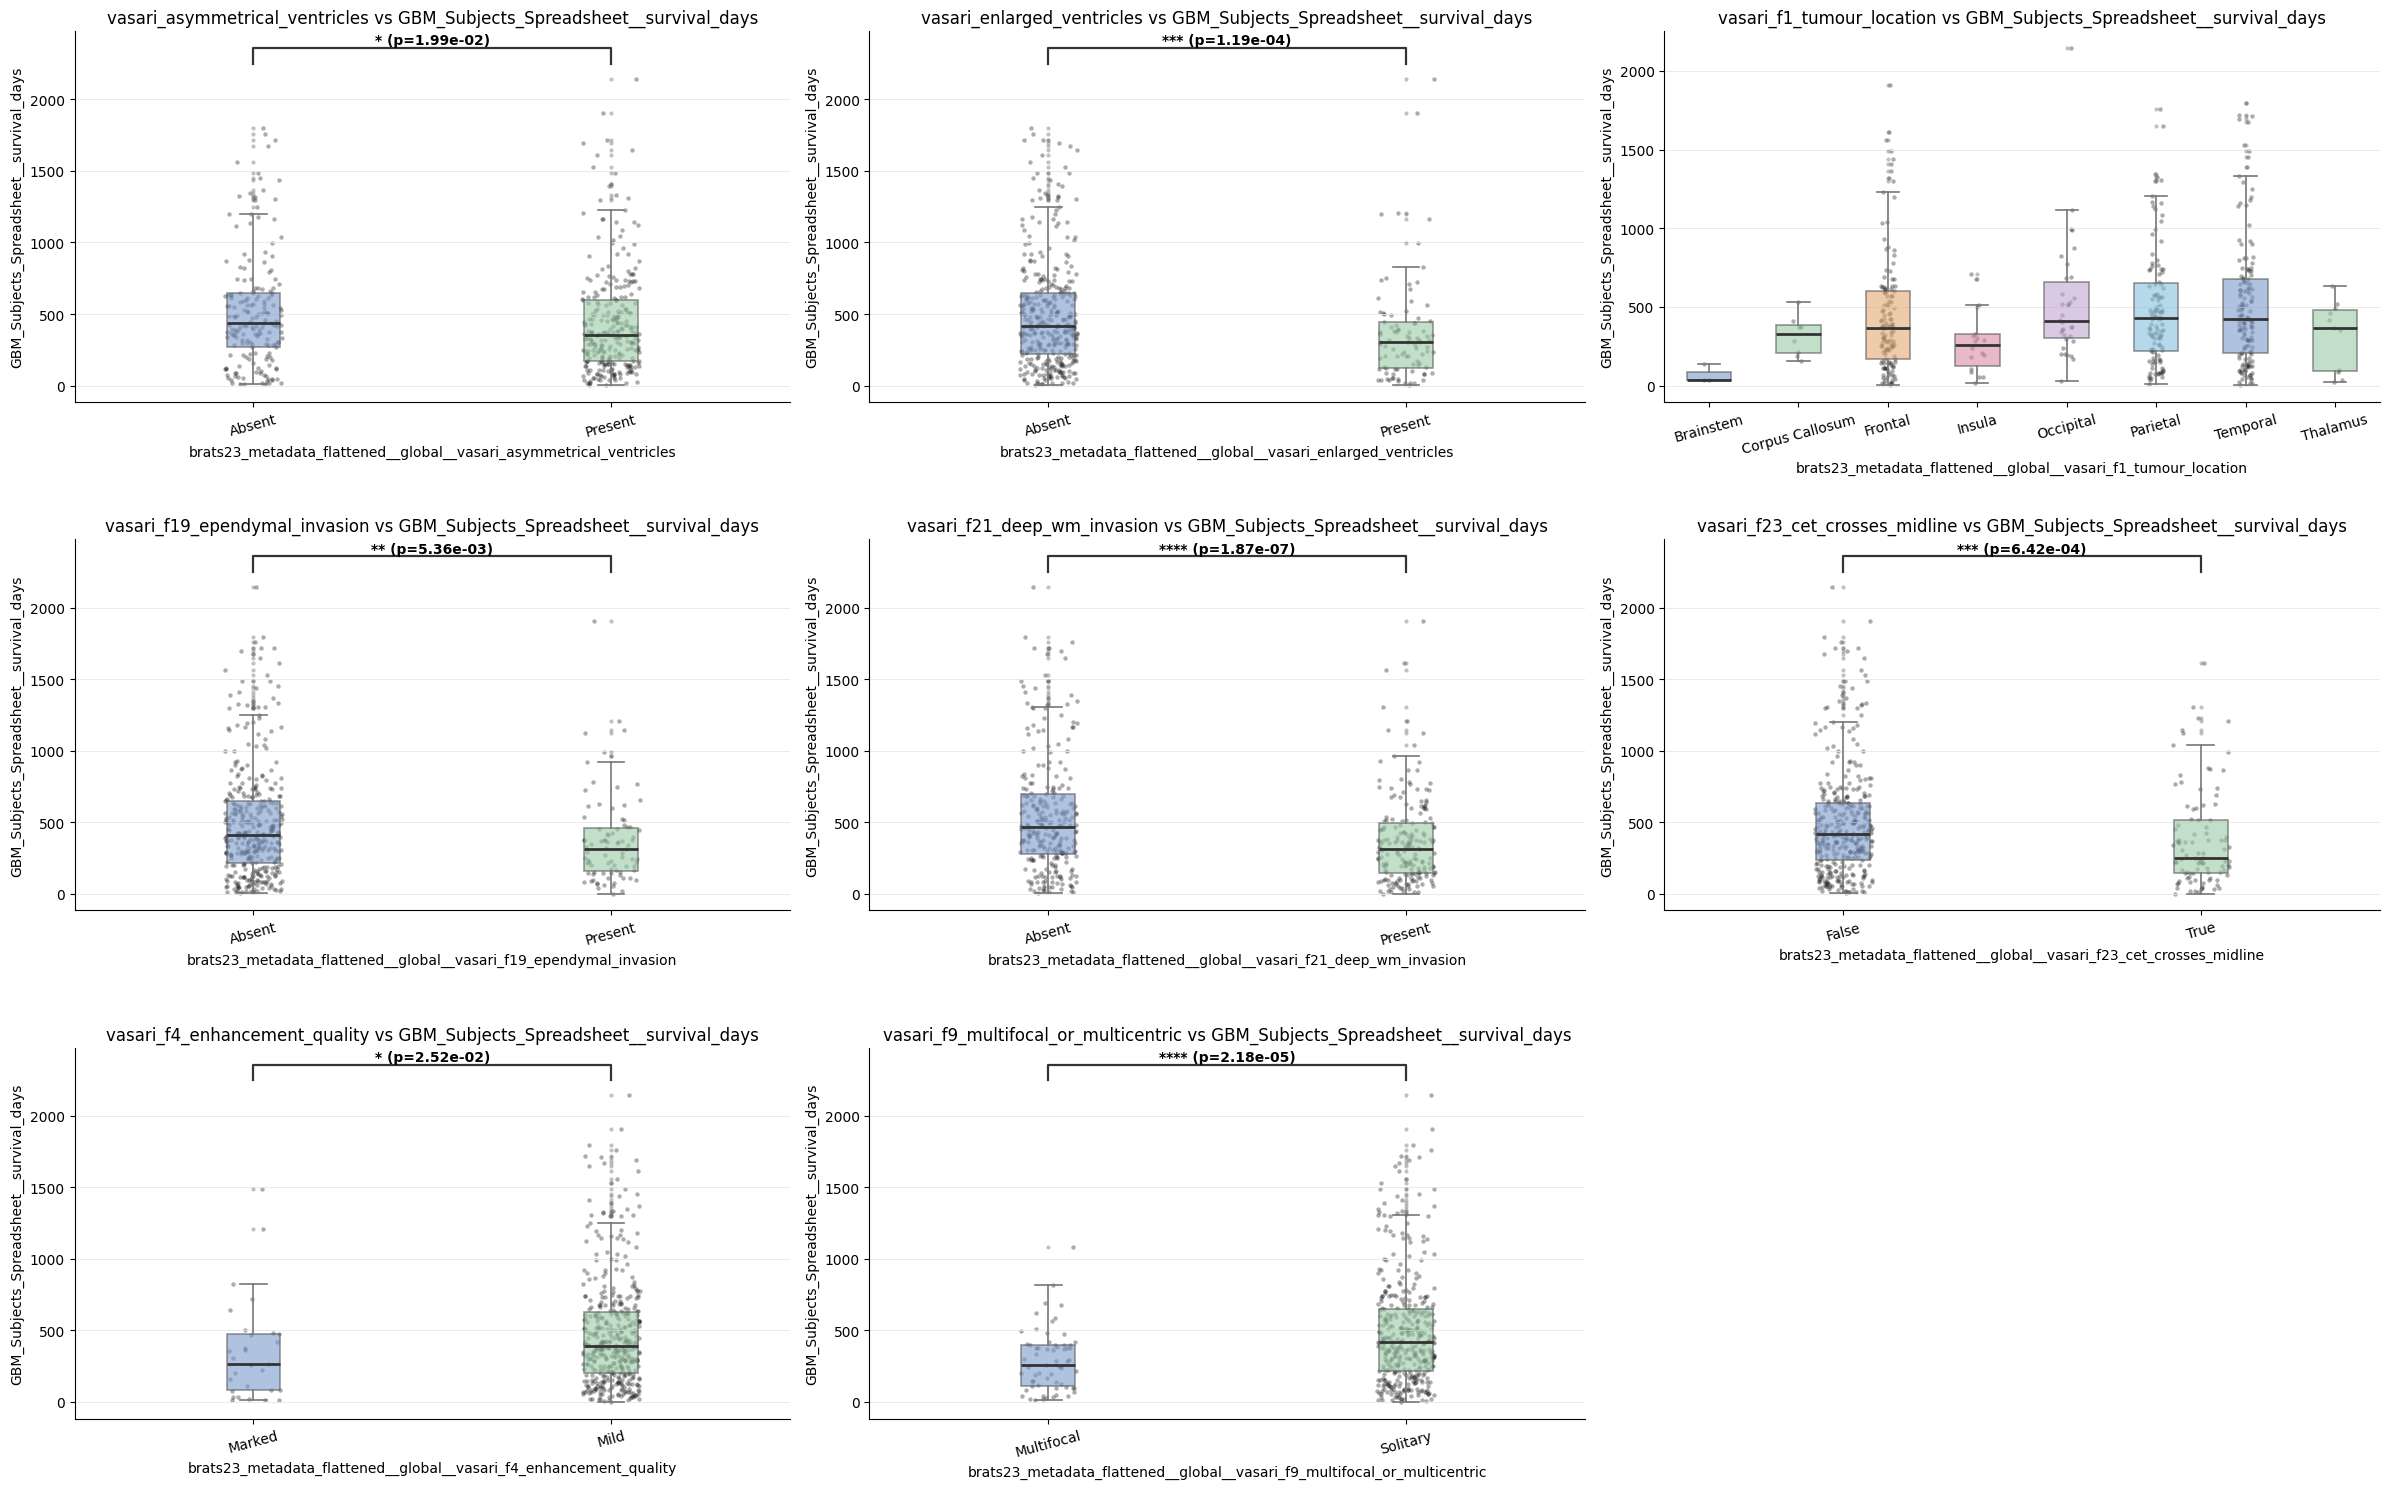

In [3]:
plots(df=merged_data,x_list=vasari_list, only_significant=True)


BraTS Segmentation Features

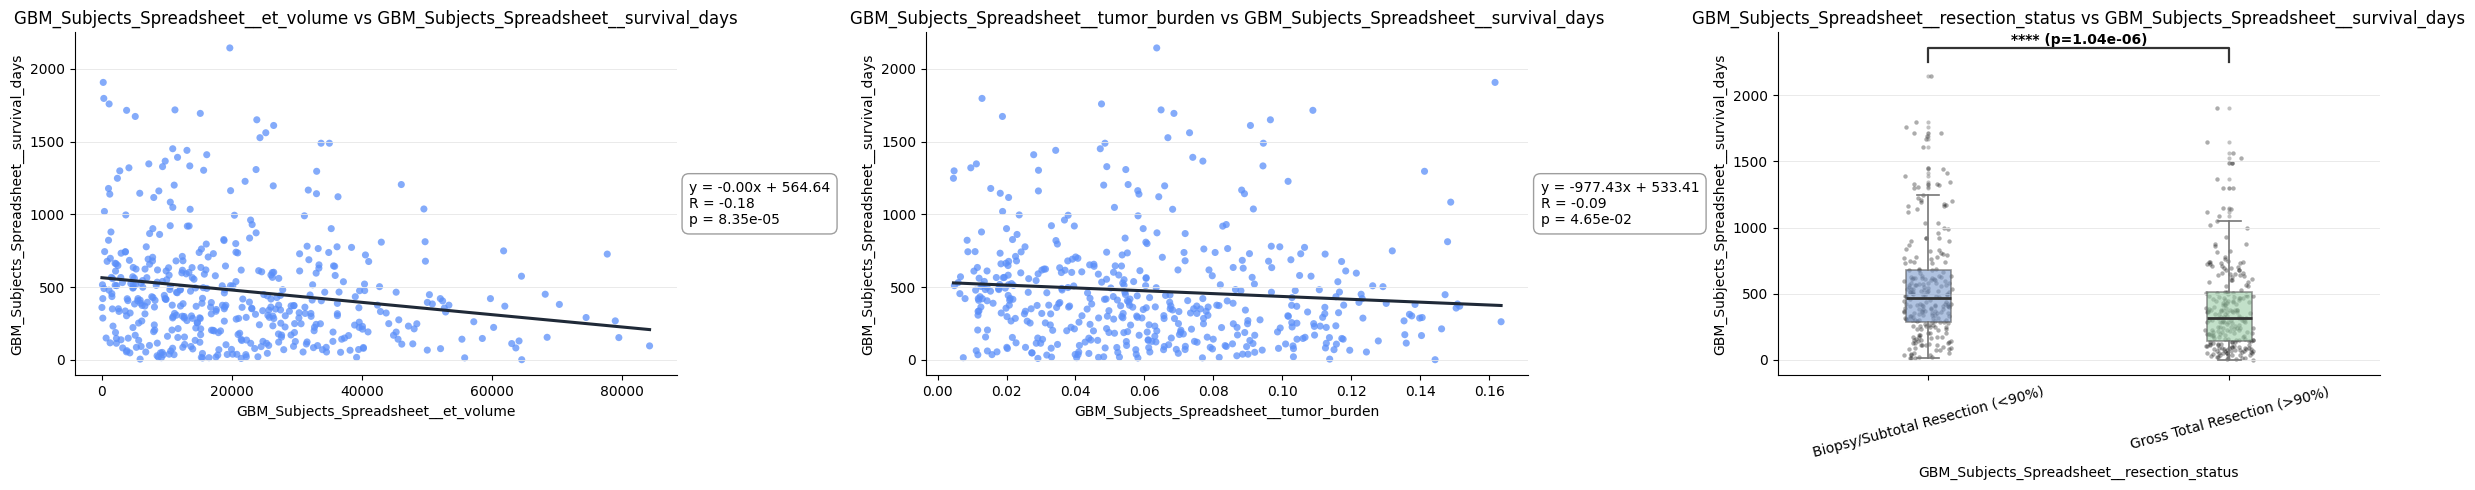

In [5]:
plots(df=merged_data,x_list=brats_masks, only_significant=True)

Patient Demographics

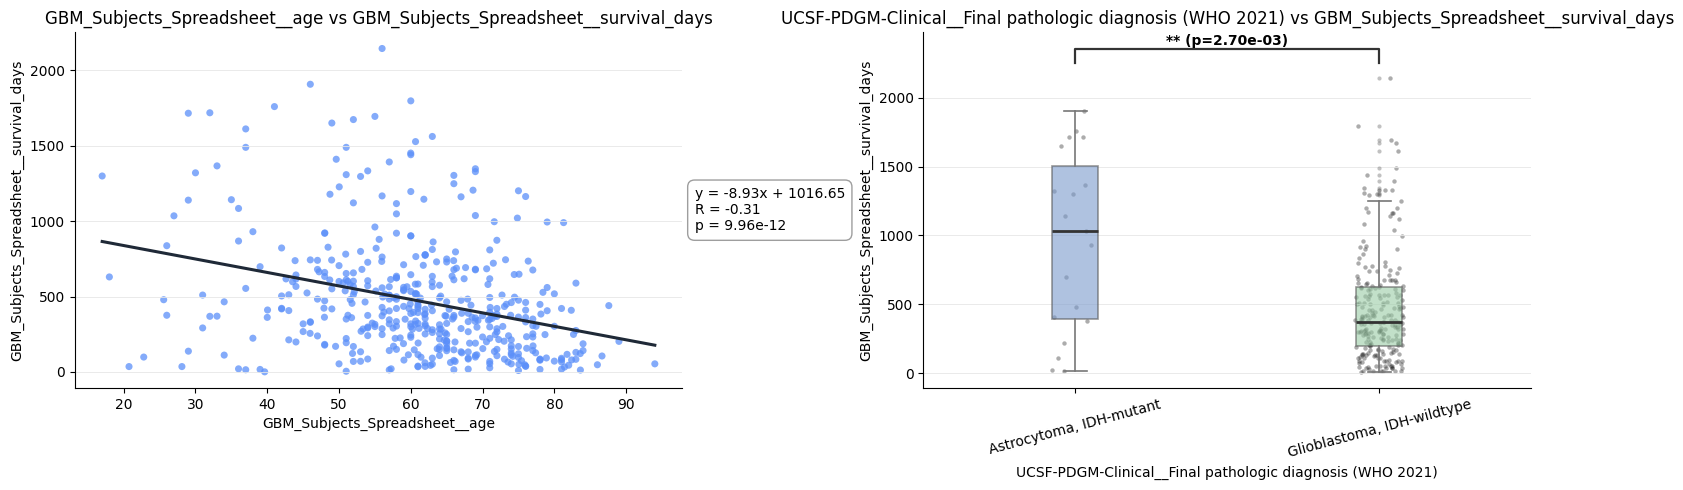

In [6]:
plots(df=merged_data,x_list=demo_list, only_significant=True)


Mutation Status

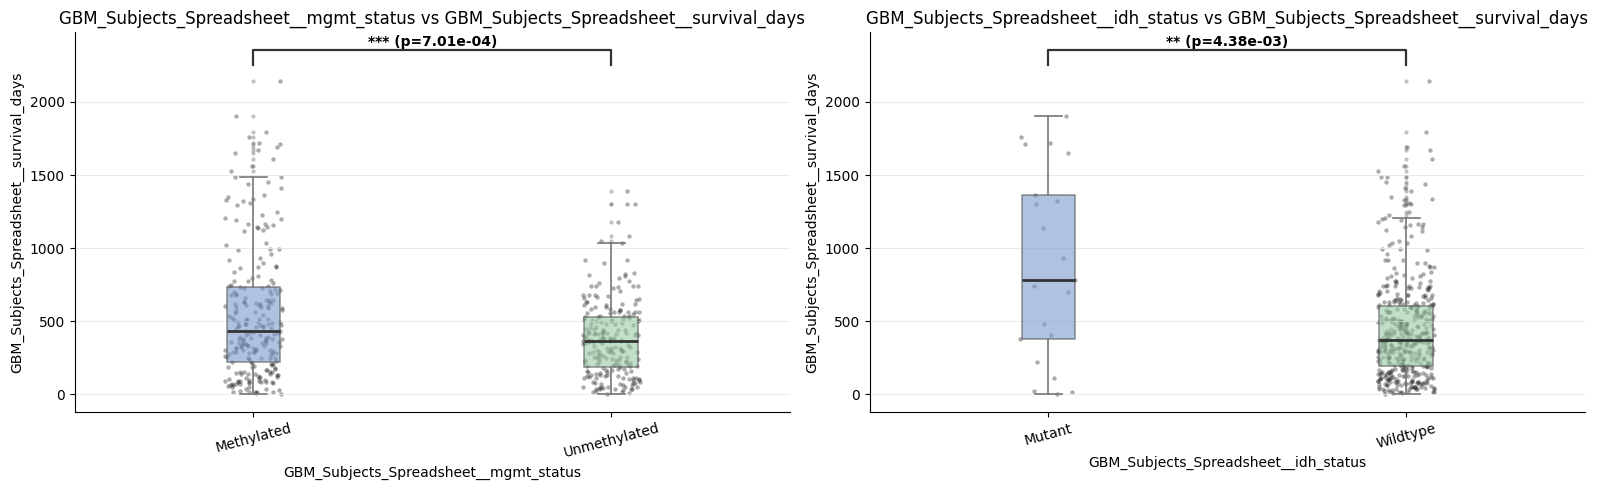

In [34]:
plots(df=merged_data,x_list=mutation_status,only_significant=True) 

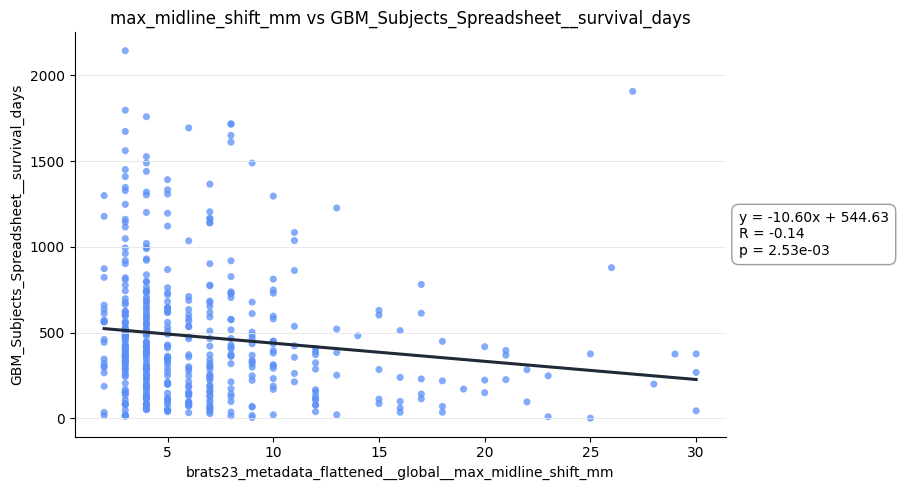

In [37]:
plots(df=merged_data,x_list=midline_shift,only_significant=True)

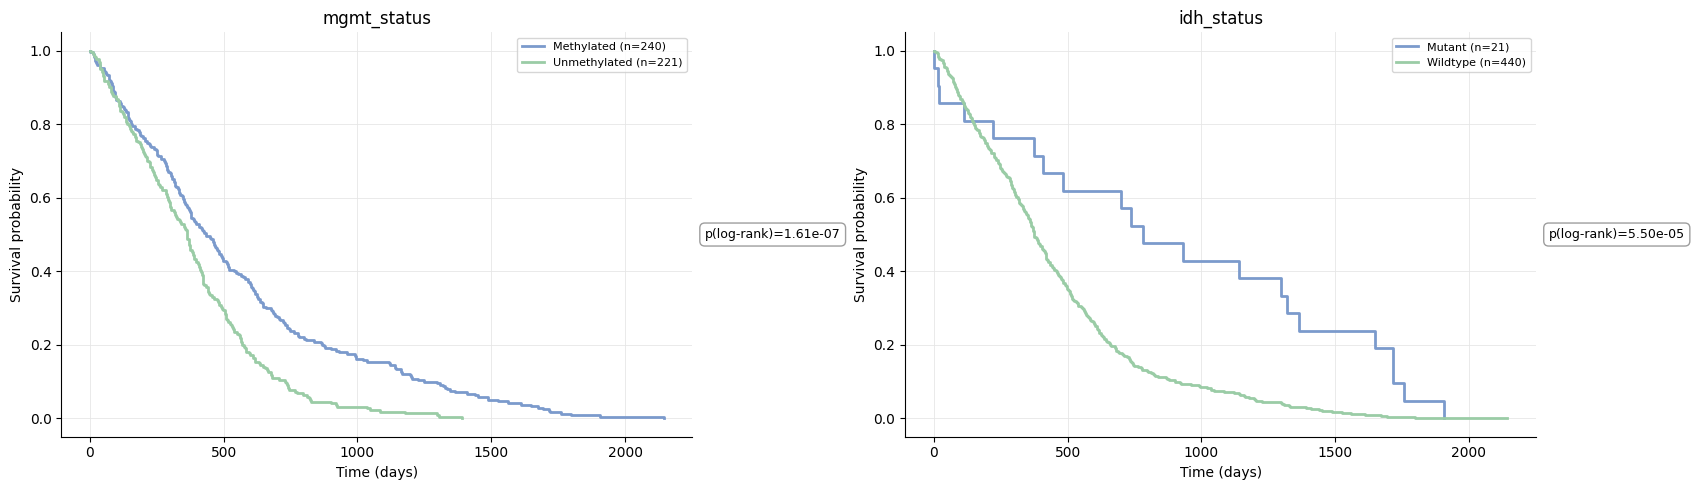

In [15]:
merged_data["event"] = 1
plots_survival(
    df=merged_data,
    x_list=mutation_status,
    only_significant=True, alpha=0.01,
    save_path='./assets/mutation_vs_surv_KM.png',
)

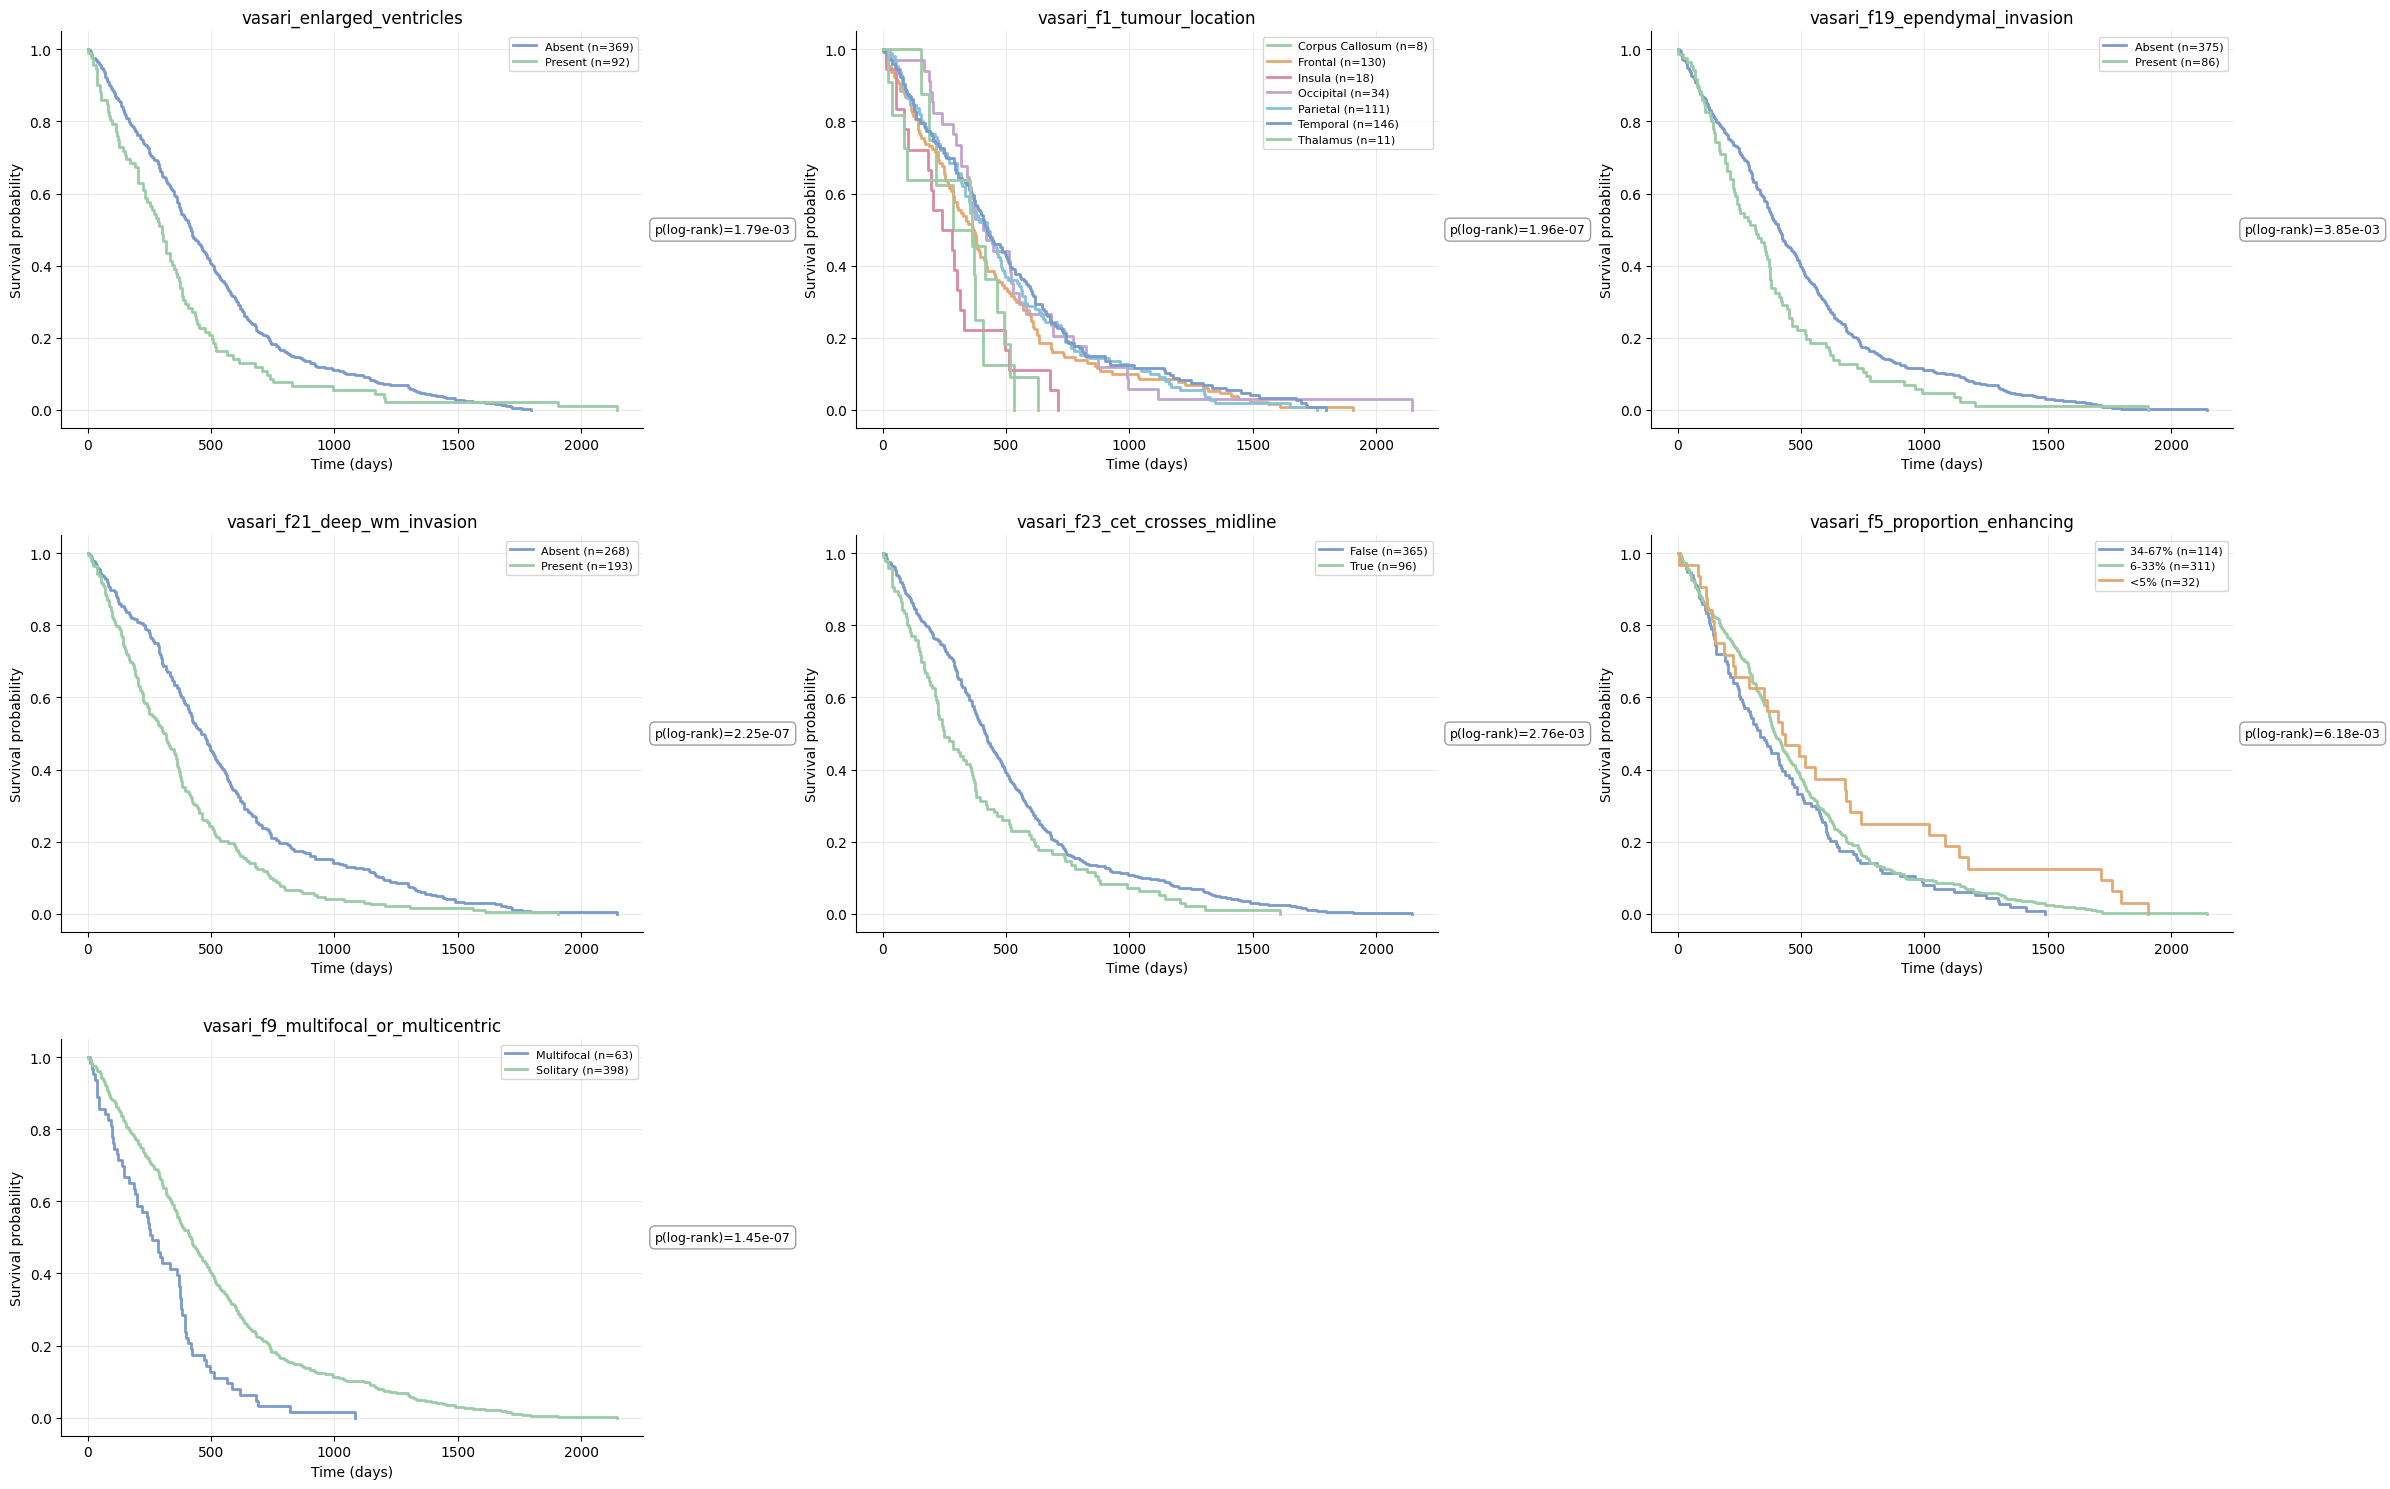

In [14]:
plots_survival(df=merged_data,x_list=vasari_list, only_significant=True, alpha=0.01)


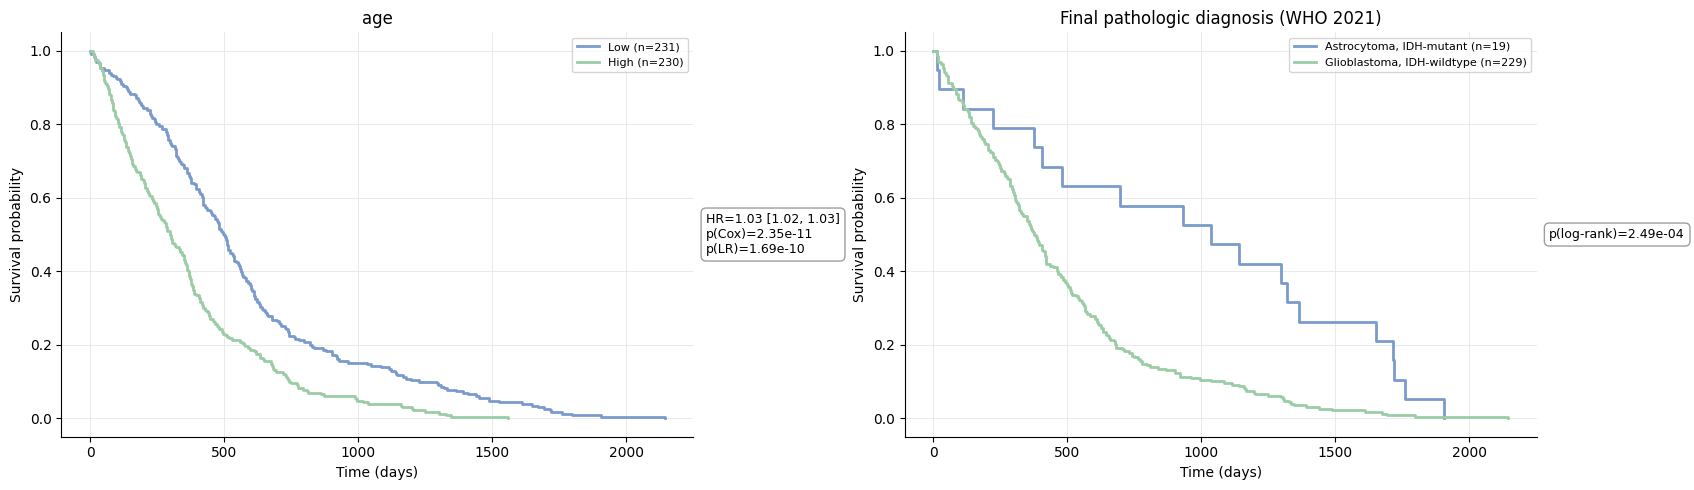

In [16]:
plots_survival(df=merged_data,x_list=demo_list, only_significant=True, alpha=0.01)


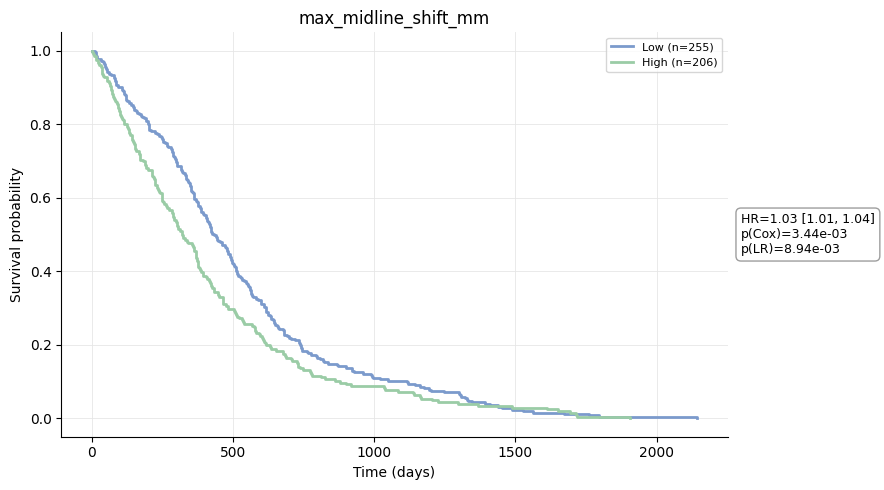

In [18]:
plots_survival(df=merged_data,x_list=midline_shift,only_significant=True, alpha=0.01)

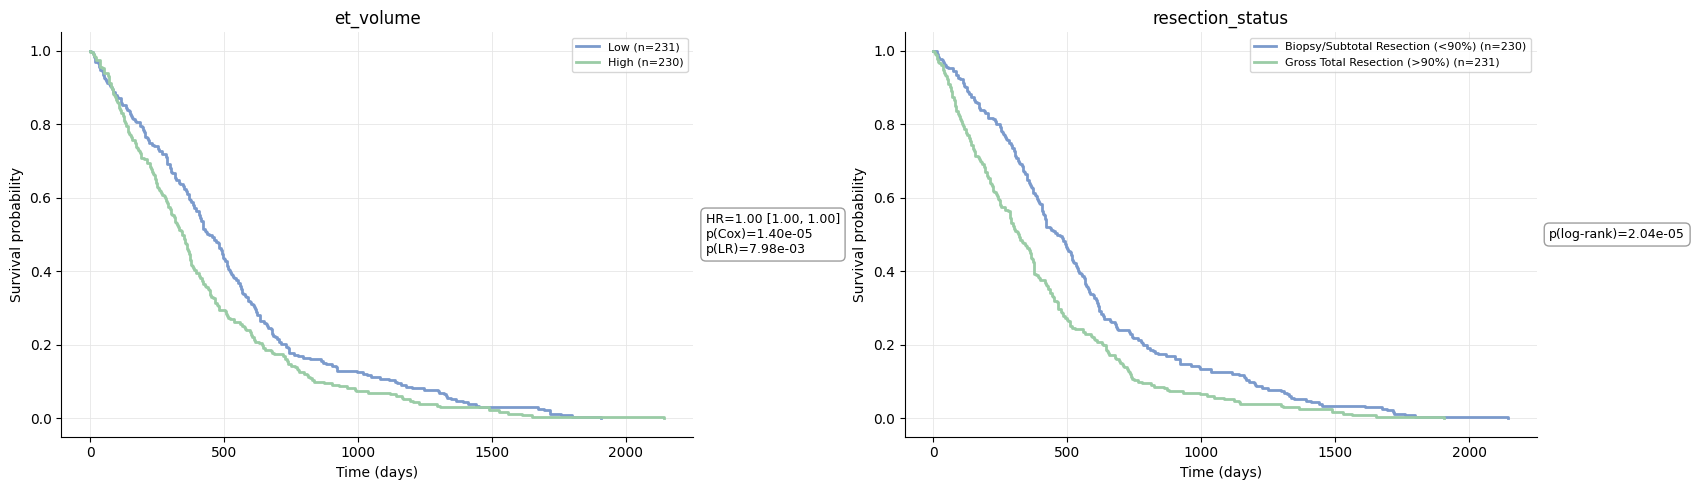

In [20]:
plots_survival(df=merged_data,x_list=brats_masks, only_significant=True, alpha=0.01)